In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

In [2]:
#data = pd.read_csv('./boston_contest.csv')
data = pd.read_csv('./boston_contest_fillna.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,3.425809,11.911765,11.036513,0.071429,0.551840,6.298645,68.247059,3.842749,9.571429,408.466387,18.467017,355.221218,12.620756,22.773950
std,7.804001,23.668291,6.946327,0.257810,0.114333,0.713019,28.256380,2.127558,8.738369,169.182483,2.179615,93.688016,7.247511,9.367767
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.080050,0.000000,5.085000,0.000000,0.448000,5.884750,44.225000,2.109150,4.000000,278.500000,17.375000,375.782500,6.840000,17.100000
50%,0.250895,0.000000,8.560000,0.000000,0.532000,6.214000,76.600000,3.275900,5.000000,330.000000,19.100000,391.240000,11.300000,21.400000
75%,3.674807,20.000000,18.100000,0.000000,0.624000,6.630250,94.025000,5.222125,24.000000,666.000000,20.200000,395.810000,16.995000,25.525000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


CRIM


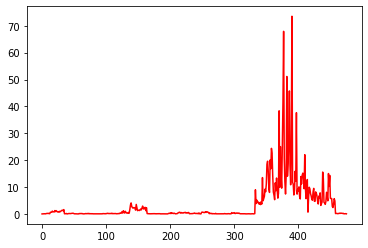

ZN


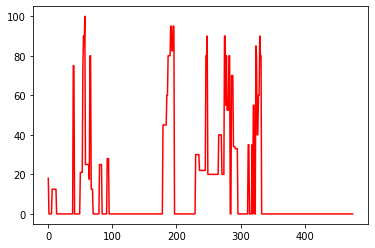

INDUS


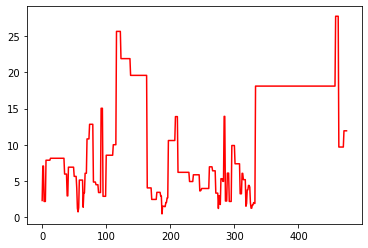

CHAS


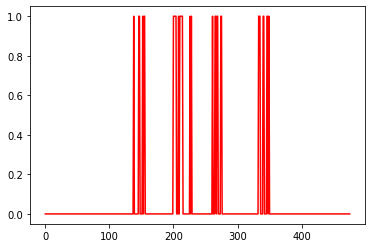

NOX


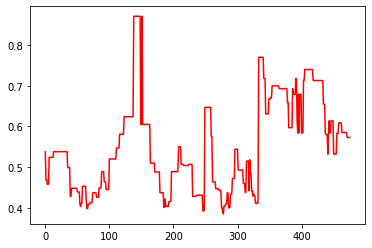

RM


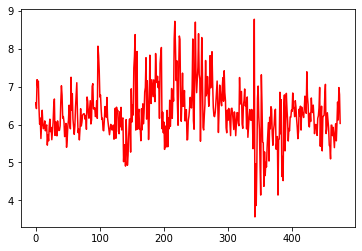

AGE


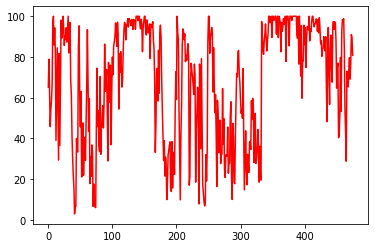

DIS


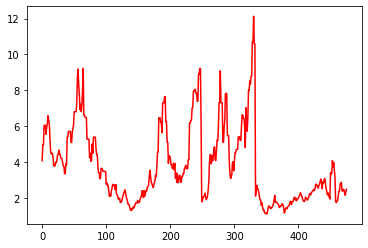

RAD


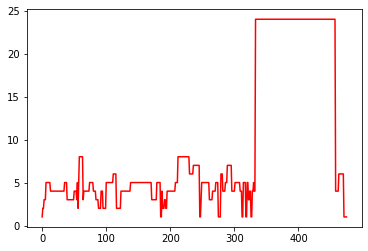

TAX


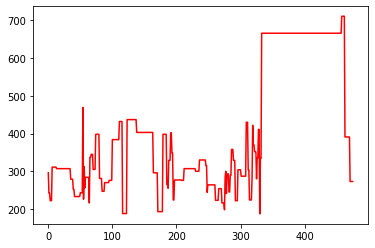

PTRATIO


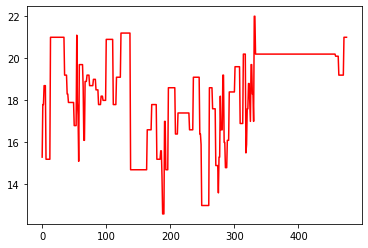

B


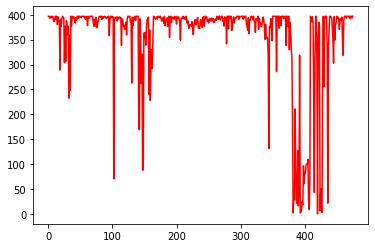

LSTAT


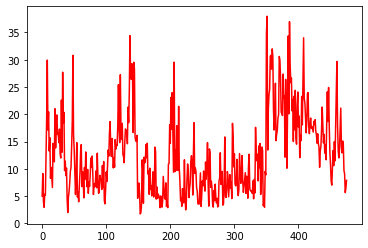

MDEV


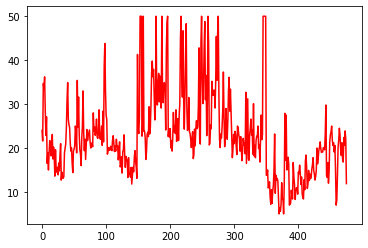

In [5]:
for c in data.columns:
    print(c)
    pp.plot(data.index, data[c], color='red')
    pp.show()


### Preprocessing

### NA 수 Count

In [6]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

In [7]:
data['ZN'] = data['ZN'].fillna(0)
data['NOX'] = data['NOX'].fillna(data.NOX.mean())

#### 상관계수

In [8]:
for col in data.columns:
    print(col)
    print(data.corrwith(data[col]))
#print(data.iloc[:, [0, 1, 2]])

CRIM
CRIM       1.000000
ZN        -0.216086
INDUS      0.424929
CHAS      -0.055244
NOX        0.454208
RM        -0.282908
AGE        0.371433
DIS       -0.393464
RAD        0.648849
TAX        0.604748
PTRATIO    0.298684
B         -0.437457
LSTAT      0.481684
MDEV      -0.400791
dtype: float64
ZN
CRIM      -0.216086
ZN         1.000000
INDUS     -0.538711
CHAS      -0.046577
NOX       -0.526979
RM         0.308723
AGE       -0.577162
DIS        0.673172
RAD       -0.322392
TAX       -0.322104
PTRATIO   -0.412658
B          0.183948
LSTAT     -0.416251
MDEV       0.353672
dtype: float64
INDUS
CRIM       0.424929
ZN        -0.538711
INDUS      1.000000
CHAS       0.059189
NOX        0.765611
RM        -0.400302
AGE        0.647328
DIS       -0.707403
RAD        0.598038
TAX        0.722439
PTRATIO    0.414374
B         -0.362375
LSTAT      0.602716
MDEV      -0.482587
dtype: float64
CHAS
CRIM      -0.055244
ZN        -0.046577
INDUS      0.059189
CHAS       1.000000
NOX        0.081

#### RAD, TAX : 0.909147, delete RAD col
#### CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), delete CHAS col

In [9]:
#data.drop(['RAD'], axis='columns', inplace=True)
#data.drop(['CHAS'], axis='columns', inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
472,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
473,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
474,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Column Def
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- NOX : nitrogen oxides concentration (parts per 10 million).

Column Definition을 보고 na를 뭘로 fill 할 것인지 결정

### fit 하기 전 reshape

In [10]:
total_cols = len(data.columns)
x = data.iloc[:,:-1].values.reshape(-1,total_cols - 1)
y = data.iloc[:,-1]
len(x)

476

In [11]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

### Train set / Test set 분리

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((333, 13), (143, 13), (333,), (143,))

### Scaler

- StandardScaler : 기본 스케일. 평균과 표준편차 사용  
- MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링  
- MaxAbsScaler : 최대절대값과 0이 각각 1, 0이 되도록 스케일링  
- RobustScaler : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화  


In [13]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
with open('lr_scaler.pkl', 'wb') as model_file:
    pickle.dump(scaler, model_file)

In [14]:
x_train_scaled

array([[3.59328379e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 2.22678905e-01, 3.97626932e-01],
       [8.84936467e-04, 0.00000000e+00, 1.31598240e-01, ...,
        4.25531915e-01, 9.85803621e-01, 1.43211921e-01],
       [9.88213412e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 0.00000000e+00, 4.33498896e-01],
       ...,
       [1.53678568e-03, 0.00000000e+00, 4.92302053e-01, ...,
        4.04255319e-01, 1.00000000e+00, 4.46743929e-01],
       [1.08165446e-03, 4.00000000e-01, 2.18108504e-01, ...,
        5.31914894e-01, 1.00000000e+00, 1.50662252e-01],
       [1.12887561e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 9.77406828e-01, 3.05463576e-01]])

### Linear Regression Fit

In [15]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
pred = lr.predict(x_test_scaled)
with open('lr_model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)


In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)

In [17]:
np.sqrt(mse)

5.651824405489362

In [18]:
isANS = False
if isANS:
    ans = pd.read_csv('./prediction.csv')
    ans.drop(['RAD'], axis='columns', inplace=True)
    ans.drop(['CHAS'], axis='columns', inplace=True)
    total_cols = len(ans.columns)
    #print(ans)
    #print(total_cols)
    x_ans = ans.iloc[:,:].values.reshape(-1,total_cols)
    #print(x_ans)
    #data.iloc[:,:-1].values.reshape(-1,)
    #y_ans = ans.iloc[:,-1]
    scaler_ans = MinMaxScaler()
    scaler_ans.fit(x_ans)
    x_ans_scaled = scaler_ans.transform(x_ans)
    pred_ans = lr.predict(x_ans_scaled)
    print(pred_ans)
    pd.DataFrame(pred_ans).to_csv("test.csv", index=False)
    #mse_ans = mean_squared_error(y_ans, pred_ans)
    #print(f"ans result = {np.sqrt(mse_ans)}")

In [19]:
ans = pd.read_csv('./answer.csv')
total_cols = len(ans.columns)
x_ans = ans.iloc[:,:-1].values.reshape(-1,total_cols-1)
x_ans_scaled = scaler.transform(x_ans)
y_ans = ans.iloc[:,-1]
pred_ans = lr.predict(x_ans_scaled)
print(pred_ans)
mse_ans = mean_squared_error(y_ans, pred_ans)
print(f"ans result = {np.sqrt(mse_ans)}")

ValueError: cannot reshape array of size 420 into shape (13)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('linear_regression', LinearRegression())
])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
pipeline.fit(x_train, y_train)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

In [ ]:
#x = data.iloc[:,:-1].values.reshape(-1,total_cols - 1)
xtest = np.array([0.00632,	18,	2.31,	0.538,	6.575,	65.2,	4.09,	296,	15.3,	396.9,	4.98])
xtest = xtest.reshape(-1, 11)
print(xtest)
pred = pipeline.predict(xtest)
pred

[[6.320e-03 1.800e+01 2.310e+00 5.380e-01 6.575e+00 6.520e+01 4.090e+00
  2.960e+02 1.530e+01 3.969e+02 4.980e+00]]


array([29.06985294])

In [ ]:
pred2 = pipeline.predict(x_test)
print(len(x_test), len(pred2))
for c in x_test:
    print(c)
print(pred2)

101 101
[1.2744e-01 0.0000e+00 6.9100e+00 4.4800e-01 6.7700e+00 2.9000e+00
 5.7209e+00 2.3300e+02 1.7900e+01 3.8541e+02 4.8400e+00]
[1.7505e-01 0.0000e+00 5.9600e+00 4.9900e-01 5.9660e+00 3.0200e+01
 3.8473e+00 2.7900e+02 1.9200e+01 3.9343e+02 1.0130e+01]
[1.3600e-02 7.5000e+01 4.0000e+00 4.1000e-01 5.8880e+00 4.7600e+01
 7.3197e+00 4.6900e+02 2.1100e+01 3.9690e+02 1.4800e+01]
[  2.37934   0.       19.58      0.871     6.13    100.        1.4191
 403.       14.7     172.91     27.8    ]
[1.6760e-01 0.0000e+00 7.3800e+00 4.9300e-01 6.4260e+00 5.2300e+01
 4.5404e+00 2.8700e+02 1.9600e+01 3.9690e+02 7.2000e+00]
[3.8214e-01 0.0000e+00 6.2000e+00 5.0400e-01 8.0400e+00 8.6500e+01
 3.2157e+00 3.0700e+02 1.7400e+01 3.8738e+02 3.1300e+00]
[4.5900e-02 5.2500e+01 5.3200e+00 4.0500e-01 6.3150e+00 4.5600e+01
 7.3172e+00 2.9300e+02 1.6600e+01 3.9690e+02 7.6000e+00]
[  0.63796   0.        8.14      0.538     6.096    84.5       4.4619
 307.       21.      380.02     10.26   ]
[1.1747e-01 1.2500e+01 7